# tree data exploration

In [22]:
import pandas as pd

In [23]:
import os

print(os.path.exists('data/NRI_Table_CensusTracts_California.csv'))

True


In [24]:
print(os.getcwd())

/home/jovyan/221finalproject


In [25]:
import geopandas as gpd

caTracts = "data/tl_2023_06_tract.zip"

# Read the GeoJSON file similarly as Shapefile
tracts = gpd.read_file(caTracts)

# Let's see what we have
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,1400000US06001442700,4427,Census Tract 4427,G5020,S,1234016,0,+37.5371513,-122.0081095,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,1400000US06001442800,4428,Census Tract 4428,G5020,S,1278646,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3..."


In [26]:
# import county boundary to clip tracts from state to LA County boundary
county = "data/County_Boundary.zip"

clip = gpd.read_file(county)

# project tracts and clip to same coordinate system
tracts = tracts.to_crs(epsg=3857)
clip = clip.to_crs(epsg=3857)

In [27]:
# Clip the tracts to the county boundary
la_tracts = gpd.clip(tracts, clip)

# Let's see what we have
la_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
399,06,037,599100,06037599100,1400000US06037599100,5991,Census Tract 5991,G5020,S,337352192,1098469235,+32.9255700,-118.4972902,"MULTIPOLYGON (((-13173947.321 3940389.954, -13..."
6991,06,037,620305,06037620305,1400000US06037620305,6203.05,Census Tract 6203.05,G5020,S,1265579,1275093,+33.8923672,-118.4165728,"POLYGON ((-13182420.366 4015434.463, -13182375..."
4991,06,037,620201,06037620201,1400000US06037620201,6202.01,Census Tract 6202.01,G5020,S,229583,183201,+33.9033703,-118.4218562,"POLYGON ((-13182717.926 4016079.726, -13182681..."
7659,06,037,620102,06037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,+33.9201935,-118.4180630,"POLYGON ((-13183097.644 4018544.687, -13182883..."
7664,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244..."


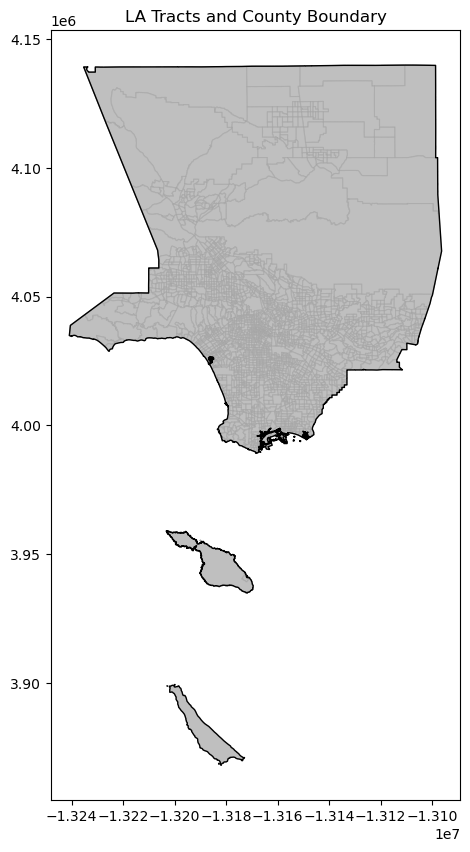

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Plot la_tracts and clip
fig, ax = plt.subplots(figsize=(10, 10))

# Plot LA tracts with opaque grey fill and dark grey skinny edge color
la_tracts.plot(ax=ax, color='grey', edgecolor='darkgrey', alpha=0.5, linewidth=0.75)

# Plot the clip boundary with black color
clip.boundary.plot(ax=ax, color='black', linewidth=1)

plt.title('LA Tracts and County Boundary')
plt.show()

In [49]:
NRI_df = pd.read_csv('data/NRI_Table_CensusTracts_California.csv', dtype={'TRACTFIPS': str})

In [50]:
#View Data
NRI_df.head()

,TRACT,TRACTFIPS,HWAV_EVNTS,HWAV_RISKV,HWAV_RISKS,HWAV_RISKR
0,400100,6001400100,24.333178,2647.154385,30.986301,Relatively Low
1,400200,6001400200,8.000000,1042.514215,22.122200,Relatively Low
2,400300,6001400300,8.000000,3421.489650,34.336203,Relatively Low
3,400400,6001400400,8.000000,2137.494980,28.594872,Relatively Low
4,400500,6001400500,8.000000,1854.243158,27.161918,Relatively Low


# Heat Wave - Hazard Type Risk Index Score

In [51]:
# keep only select columns (Educational attainment 25 yrs and older)
columns_to_keep = ['TRACTFIPS', 
                   'HWAV_RISKS',
                   ]
#add it to a new dataframe
NRI_df=NRI_df[columns_to_keep]
NRI_df.head()

,TRACTFIPS,HWAV_RISKS
0,6001400100,30.986301
1,6001400200,22.122200
2,6001400300,34.336203
3,6001400400,28.594872
4,6001400500,27.161918


In [52]:
print(NRI_df.columns.tolist())


['TRACTFIPS', 'HWAV_RISKS']


In [53]:
# Rename the column and add leading zeros
NRI_df = NRI_df.rename(columns={'TRACTFIPS': 'GEOID'})

# Print the head of the dataframe to verify the changes
NRI_df.head()

,GEOID,HWAV_RISKS
0,6001400100,30.986301
1,6001400200,22.122200
2,6001400300,34.336203
3,6001400400,28.594872
4,6001400500,27.161918


In [54]:
# Include only data that is above or equal to 0
NRI_df = NRI_df.loc[NRI_df['HWAV_RISKS'] >=0]
NRI_df.head()

,GEOID,HWAV_RISKS
0,6001400100,30.986301
1,6001400200,22.122200
2,6001400300,34.336203
3,6001400400,28.594872
4,6001400500,27.161918


In [55]:
# Add leading zeros to GEOID column
NRI_df['GEOID'] = NRI_df['GEOID'].str.zfill(11)

# Print the head of the dataframe to verify the changes
NRI_df.head()

,GEOID,HWAV_RISKS
0,06001400100,30.986301
1,06001400200,22.122200
2,06001400300,34.336203
3,06001400400,28.594872
4,06001400500,27.161918


In [56]:
la_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
399,06,037,599100,06037599100,1400000US06037599100,5991,Census Tract 5991,G5020,S,337352192,1098469235,+32.9255700,-118.4972902,"MULTIPOLYGON (((-13173947.321 3940389.954, -13..."
6991,06,037,620305,06037620305,1400000US06037620305,6203.05,Census Tract 6203.05,G5020,S,1265579,1275093,+33.8923672,-118.4165728,"POLYGON ((-13182420.366 4015434.463, -13182375..."
4991,06,037,620201,06037620201,1400000US06037620201,6202.01,Census Tract 6202.01,G5020,S,229583,183201,+33.9033703,-118.4218562,"POLYGON ((-13182717.926 4016079.726, -13182681..."
7659,06,037,620102,06037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,+33.9201935,-118.4180630,"POLYGON ((-13183097.644 4018544.687, -13182883..."
7664,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244..."


In [57]:
# Merge the dataframes on GEOID
merged_tracts = la_tracts.merge(NRI_df, left_on='GEOID', right_on='GEOID')

# Print the head of the merged dataframe
print(merged_tracts.head())

  STATEFP COUNTYFP TRACTCE        GEOID               GEOIDFQ     NAME  \
0      06      037  599100  06037599100  1400000US06037599100     5991   
1      06      037  620305  06037620305  1400000US06037620305  6203.05   
2      06      037  620201  06037620201  1400000US06037620201  6202.01   
3      06      037  620102  06037620102  1400000US06037620102  6201.02   
4      06      037  620101  06037620101  1400000US06037620101  6201.01   

               NAMELSAD  MTFCC FUNCSTAT      ALAND      AWATER     INTPTLAT  \
0     Census Tract 5991  G5020        S  337352192  1098469235  +32.9255700   
1  Census Tract 6203.05  G5020        S    1265579     1275093  +33.8923672   
2  Census Tract 6202.01  G5020        S     229583      183201  +33.9033703   
3  Census Tract 6201.02  G5020        S     871913           0  +33.9201935   
4  Census Tract 6201.01  G5020        S    1335926        3064  +33.9274501   

       INTPTLON                                           geometry  HWAV_RISKS  

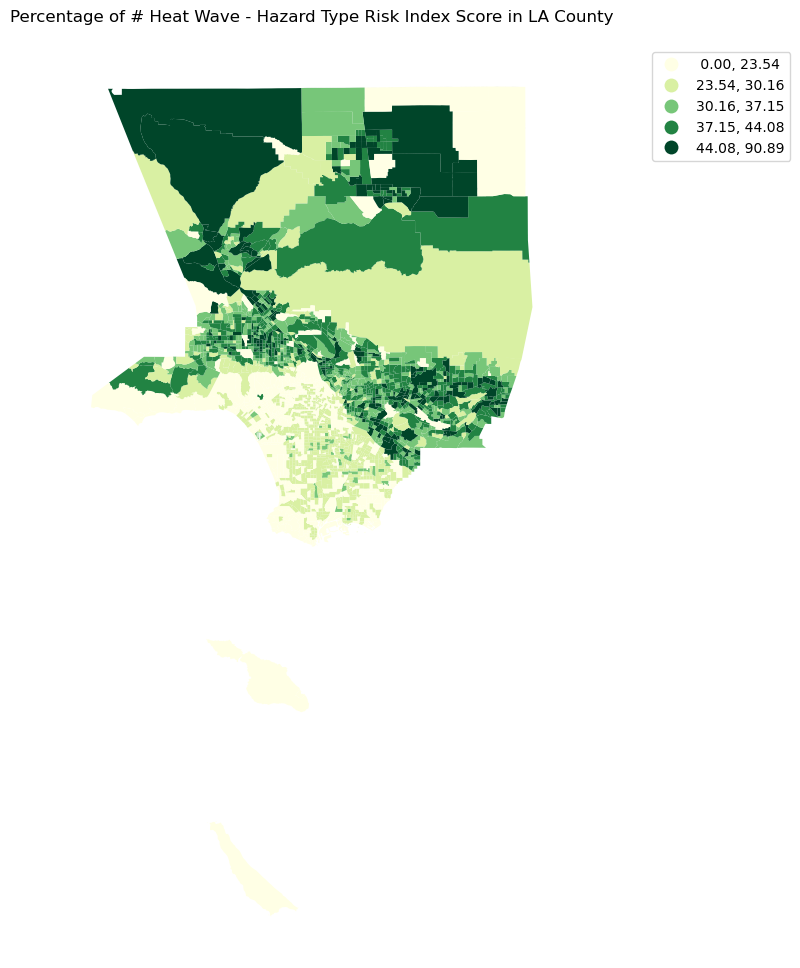

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set fig, ax and plot with legend outside of plot
fig, ax = plt.subplots(figsize=(10, 10))
merged_tracts.plot(column="HWAV_RISKS", scheme="Natural_Breaks", k=5, cmap="YlGn", linewidth=0, legend=True, ax=ax)

# Use tight layout
plt.tight_layout()
plt.title('Percentage of # Heat Wave - Hazard Type Risk Index Score in LA County')

ax.axis('off')

# Place legend outside of plot
ax.get_legend().set_bbox_to_anchor((1.5, 1))


In [61]:
import mapclassify

In [63]:
mapclassify.NaturalBreaks(y=merged_tracts['HWAV_RISKS'], k=5)

NaturalBreaks

   Interval      Count
----------------------
[ 0.00, 23.62] |   683
(23.62, 30.19] |   733
(30.19, 37.15] |   424
(37.15, 43.97] |   463
(43.97, 90.89] |   231

In [64]:
mapclassify.Quantiles(y=merged_tracts['HWAV_RISKS'])

Quantiles

   Interval      Count
----------------------
[ 0.00, 22.43] |   507
(22.43, 26.11] |   507
(26.11, 32.20] |   506
(32.20, 39.68] |   507
(39.68, 90.89] |   507

In [65]:
classifier = mapclassify.NaturalBreaks(y=merged_tracts['HWAV_RISKS'], k=5)
classifier.bins

array([23.57893735, 30.17528421, 37.10697807, 43.97326737, 90.8944965 ])

In [66]:
# Create a Natural Breaks classifier
classifier = mapclassify.NaturalBreaks.make(k=5)

In [67]:
# Classify the data
classifications = merged_tracts[['HWAV_RISKS']].apply(classifier)

# Let's see what we have
classifications.head()

,HWAV_RISKS
0,0
1,0
2,0
3,0
4,1


In [68]:
type(classifications)

pandas.core.frame.DataFrame

In [69]:
# Rename the column so that we know that it was classified with natural breaks
merged_tracts['heatrisk_class'] = merged_tracts[['HWAV_RISKS']].apply(classifier)

# Check the original values and classification
merged_tracts[['heatrisk_class', 'HWAV_RISKS']].head()

,heatrisk_class,HWAV_RISKS
0,0,15.892118
1,0,21.851068
2,0,16.687675
3,0,20.628597
4,1,24.027256


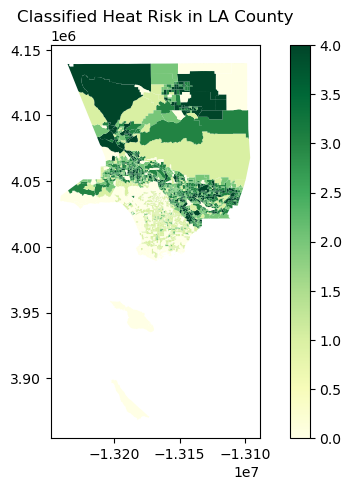

In [72]:
# Plot
merged_tracts.plot(column="heatrisk_class", linewidth=0, legend=True)

# Use tight layout
plt.tight_layout()
plt.title('Classified Heat Risk in LA County')
plt.set_cmap('YlGn')

<Axes: ylabel='Frequency'>

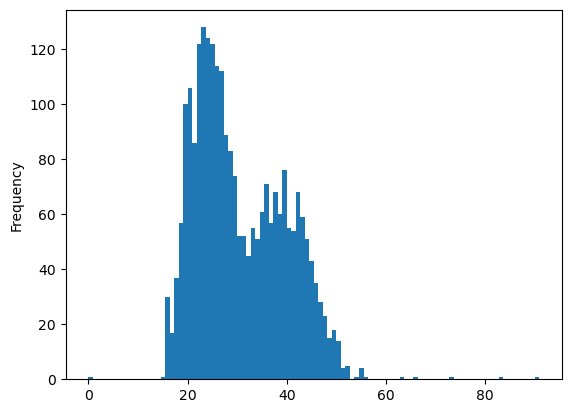

In [76]:
# Histogram for heat risk 
merged_tracts['HWAV_RISKS'].plot.hist(bins=100)

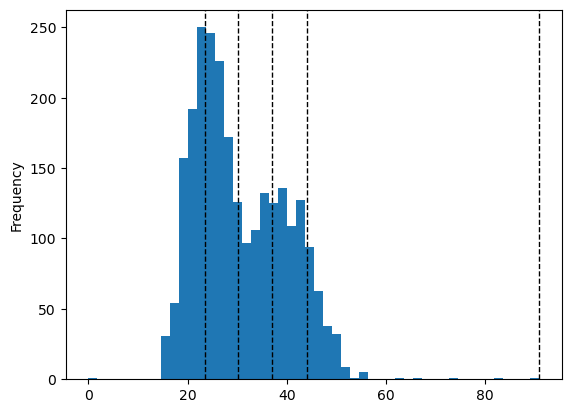

In [77]:
# Define classifier
classifier = mapclassify.NaturalBreaks(y=merged_tracts['HWAV_RISKS'], k=5)

# Plot histogram for public transport rush hour travel time
merged_tracts['HWAV_RISKS'].plot.hist(bins=50)

# Add vertical lines for class breaks
for value in classifier.bins:
    plt.axvline(value, color='k', linestyle='dashed', linewidth=1)

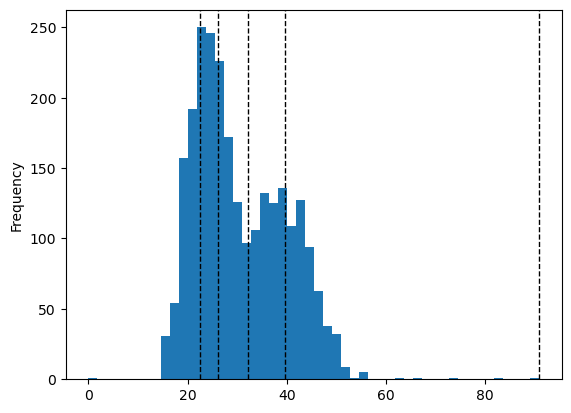

In [78]:
# Define classifier
classifier = mapclassify.Quantiles(y=merged_tracts['HWAV_RISKS'])

# Plot histogram for extreme heat
merged_tracts['HWAV_RISKS'].plot.hist(bins=50)

for value in classifier.bins:
    plt.axvline(value, color='k', linestyle='dashed', linewidth=1)

In [79]:
# Export merged_tracts to a CSV file
merged_tracts.to_csv('merged_tracts.csv', index=False)